In [1]:
import pandas as pd
import numpy as np

In [128]:
saf=pd.read_csv("/Users/hmwangila/Downloads/Saf_share_prices.csv").sort_values(by='Date')
saf.head()

,Date,Open,High,Low,Close,Volume
191,01/02/2018,26.75,27.00,26.75,26.75,"3,904,800"
290,01/02/2019,23.00,23.00,22.20,22.25,"1,778,300"
386,01/02/2020,31.60,31.60,31.00,31.30,"349,300"
766,01/02/2024,13.70,13.95,13.65,13.75,"176,500"
103,01/03/2017,18.90,19.20,18.90,19.00,"10,112,100"


In [20]:
saf.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

<AxesSubplot:xlabel='Date', ylabel='Close'>

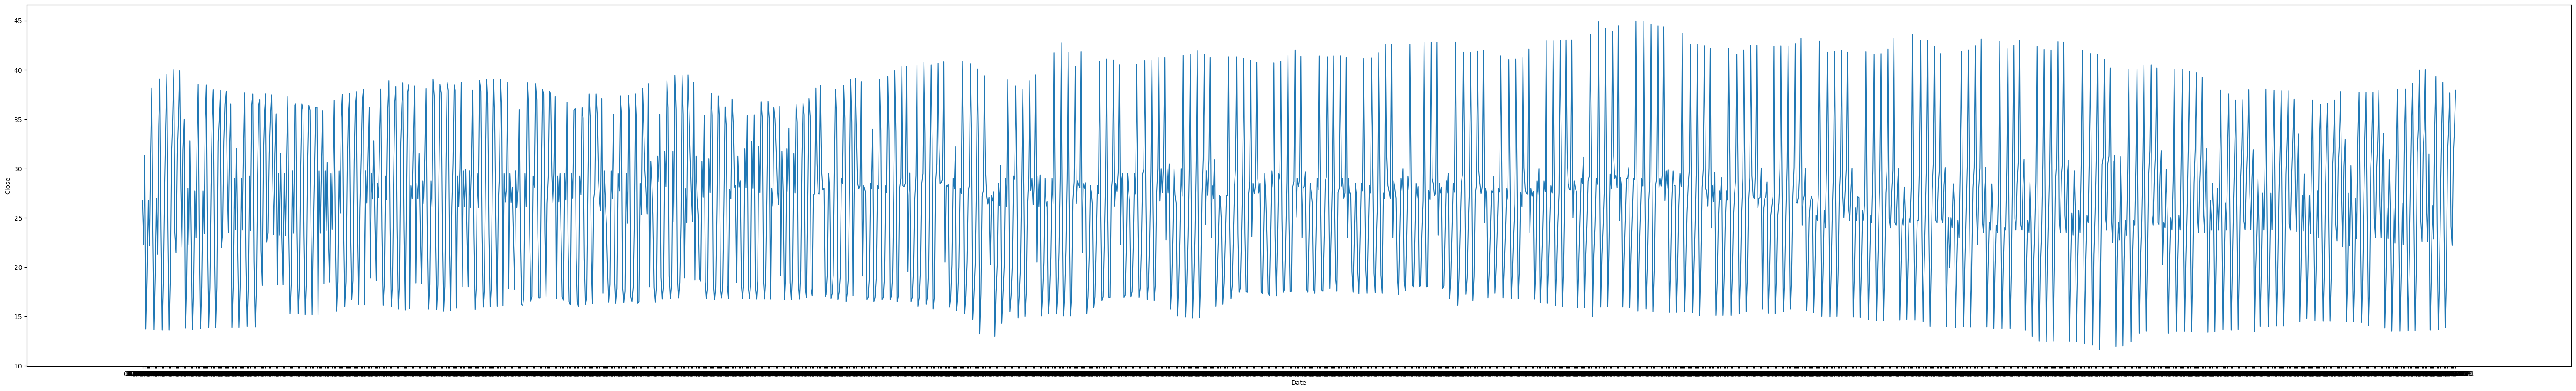

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(70,10))
sns.lineplot(x=saf['Date'],y=saf['Close'])


In [28]:
saf.tail()

,Date,Open,High,Low,Close,Volume
1997,12/30/2022,24.00,24.5,24.00,24.15,"13,959,200"
1998,12/31/2018,22.80,22.8,22.10,22.20,"3,679,200"
1999,12/31/2019,31.45,31.6,31.00,31.50,"6,325,600"
2000,12/31/2020,34.25,34.5,34.15,34.25,"1,342,600"
2001,12/31/2021,37.15,38.0,37.15,37.95,"6,797,900"


In [130]:
saf['ROC_1']=saf['Close'].pct_change(periods=1)
saf['ROC_3']=saf['Close'].pct_change(periods=3)
saf['ROC_7']=saf['Close'].pct_change(periods=7)
saf['ROC_14']=saf['Close'].pct_change(periods=14)
saf['ROC_30']=saf['Close'].pct_change(periods=30)

In [131]:
saf2=saf.dropna()
saf2.head()

,Date,Open,High,Low,Close,Volume,ROC_1,ROC_3,ROC_7,ROC_14,ROC_30
429,01/07/2020,31.55,31.70,31.3,31.55,"7,754,500",0.470862,-0.211250,1.319853,0.320084,0.179439
526,01/07/2021,35.00,35.05,34.6,34.95,"2,094,700",0.107765,0.487234,0.879032,1.569853,0.570787
624,01/07/2022,40.00,40.00,38.9,39.90,"4,576,700",0.141631,0.860140,0.266667,1.122340,0.274760
242,01/08/2018,27.50,28.25,27.5,28.00,"6,873,500",-0.298246,-0.112520,-0.200000,0.000000,1.036364
340,01/08/2019,21.80,22.20,21.5,22.00,"1,532,800",-0.214286,-0.370529,-0.450000,-0.360465,0.157895


In [132]:
categories = [-float('inf'), -10, -5, -1, 1, 5, 10, float('inf')]
conditions = [0, 1, 2, 3, 4, 5, 6]

# Create a new column 'category' based on the conditions
saf2['ROC_1'] = pd.cut(saf2['ROC_1']*100, bins=categories, labels=conditions, right=False)
saf2['ROC_3'] = pd.cut(saf2['ROC_3']*100, bins=categories, labels=conditions, right=False)

saf2['ROC_7'] = pd.cut(saf2['ROC_7']*100, bins=categories, labels=conditions, right=False)

saf2['ROC_14'] = pd.cut(saf2['ROC_14']*100, bins=categories, labels=conditions, right=False)

saf2['ROC_30'] = pd.cut(saf2['ROC_30']*100, bins=categories, labels=conditions, right=False)



saf2.head()

/var/folders/xx/6qdrhh7s251bjz83pp43dld00000gp/T/ipykernel_92715/1326198065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saf2['ROC_1'] = pd.cut(saf2['ROC_1']*100, bins=categories, labels=conditions, right=False)
/var/folders/xx/6qdrhh7s251bjz83pp43dld00000gp/T/ipykernel_92715/1326198065.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saf2['ROC_3'] = pd.cut(saf2['ROC_3']*100, bins=categories, labels=conditions, right=False)
/var/folders/xx/6qdrhh7s251bjz83pp43dld00000gp/T/ipykernel_92715/132619806

,Date,Open,High,Low,Close,Volume,ROC_1,ROC_3,ROC_7,ROC_14,ROC_30
429,01/07/2020,31.55,31.70,31.3,31.55,"7,754,500",6,0,6,6,6
526,01/07/2021,35.00,35.05,34.6,34.95,"2,094,700",6,6,6,6,6
624,01/07/2022,40.00,40.00,38.9,39.90,"4,576,700",6,6,6,6,6
242,01/08/2018,27.50,28.25,27.5,28.00,"6,873,500",0,0,0,3,6
340,01/08/2019,21.80,22.20,21.5,22.00,"1,532,800",0,0,0,0,6


In [133]:
saf2.reset_index(inplace=True,drop=True)#.reset_index(inplace=True)

In [143]:
saf2.reset_index(inplace=True)
saf2.head()

,level_0,index,Date,Open,High,Low,Close,Volume,ROC_1,ROC_3,ROC_7,ROC_14,ROC_30
0,0,0,01/07/2020,31.55,31.70,31.3,31.55,"7,754,500",6,0,6,6,6
1,1,1,01/07/2021,35.00,35.05,34.6,34.95,"2,094,700",6,6,6,6,6
2,2,2,01/07/2022,40.00,40.00,38.9,39.90,"4,576,700",6,6,6,6,6
3,3,3,01/08/2018,27.50,28.25,27.5,28.00,"6,873,500",0,0,0,3,6
4,4,4,01/08/2019,21.80,22.20,21.5,22.00,"1,532,800",0,0,0,0,6


In [199]:
saf3=saf2[['index','ROC_1','ROC_3','ROC_7','ROC_14','ROC_30']].rename(columns={'index':'ID STATE'})
saf3.head()

,ID STATE,ROC_1,ROC_3,ROC_7,ROC_14,ROC_30
0,0,6,0,6,6,6
1,1,6,6,6,6,6
2,2,6,6,6,6,6
3,3,0,0,0,3,6
4,4,0,0,0,0,6


In [200]:
saf1=saf2[['Open','High','Low','Close','Volume']]
saf1.head()

,Open,High,Low,Close,Volume
0,31.55,31.70,31.3,31.55,"7,754,500"
1,35.00,35.05,34.6,34.95,"2,094,700"
2,40.00,40.00,38.9,39.90,"4,576,700"
3,27.50,28.25,27.5,28.00,"6,873,500"
4,21.80,22.20,21.5,22.00,"1,532,800"


In [176]:
class AgenteQ:
    
    def __init__(self, states, num_states, num_actions, learning_rate, discount_factor):
        """
        Default constructor

        @param num_states: number of existent states in dataset
        @param num_actions: number of possible actions
        @param learning_rate: magnitude of updating q-values
        @param discount_factor: relative importance of long-term rewards
        """
        self.num_states = num_states
        self.num_actions = num_actions
        self.learning_rate  = learning_rate
        self.discount_factor = discount_factor
        self.q_table = np.zeros((num_states,num_actions))
        self.states = np.array(states)

    def choose_action(self,state,epsilon):
        """
        Function used to choose the optimal action through a Epsilon-Greedy policy

        @param state: state the agent is facing
        @param epsilon: exploration-exploitation ratio of actions
        """
        if np.random.uniform() < epsilon:
            return int(np.random.choice(self.num_actions))
        else:
            index = np.where((self.states == state).all(axis=1))
            if index[0].size == 0:
                return int(0)
            else:
                return int(np.argmax(self.q_table[index[0],:]))

    def update_q_table(self,state,action,reward,next_state):
        """
        Function to update de Q-Values.
        
        Q(s,a)->Q(s,a)+α⋅(r+γ*max(a')*Q(s',a')-Q(s,a))
            Q(s,a) ===> valor actual para el par state-acción en la Q-Table.
            α ========> tasa de aprendizaje (cuan agresivo se produce el ajuste de valores en la Q-Table)
            r ========> reward obtenida al tomar la acción 'a' en el state 's'
            γ ========> factor de descuento (ponderación de importancia de rewards futuras-inmediatas)
            max(a')*Q(s',a') ===> máximo valor de la Q-Table para las posibles actiones en el siguiente state (estimación del valor futuro)
    
        @param state: state to update
        @param action: action choosen
        @param reward: reward for taking the action
        @param next_state: following state
        """
    
        index = np.where((self.states == state).all(axis=1))
        next_state = np.where((self.states == next_state).all(axis=1))
    
        # Actual Value -> Q(s,a)
        valor_q_actual = self.q_table[index[0],action]
    
        # Max. value for the next state -> max(a')*Q(s',a')
        valor_q_next = np.max(self.q_table[next_state[0]])
    
        # r+γ*max(a')*Q(s',a')
        valor_objective = reward + self.learning_rate * valor_q_next
    
        # Update the Q-Values of the Q-Table
        self.q_table[index[0],action] = valor_q_actual + self.learning_rate*(valor_objective-valor_q_actual)



In [177]:
def train_agent(states, dataOHLCV, q_value_agent, initial_investment, num_episodes):
        """
        Function to train the agent
        @param states: states provided to the training phase
        @param dataOHLCV: OHLCV of the states provided
        @param q_value_agent: instance of the define agent
        @param initial_investment: initial portfolio value
        @num_episodes: number of episodes of the training phase
        """
        max_epsilon = 1.00
        min_epsilon = 0.00
        exploration_decay_rate = 0.01
        epsilon = max_epsilon

        portfolio_performance = []

        for iteration in range(num_episodes):
            if epsilon-exploration_decay_rate >= min_epsilon:
                epsilon = epsilon - exploration_decay_rate

            Owned = False
            Portfolio_Value = []
            Portfolio_Value.append(initial_investment)
            QuantityOwned = np.float64(0)

            for i in range(len(states)-1):
                # Índices
                next = states[i+1]
                state = i
    
                # reward
                reward = 0

                # action a realizar
                
                action = q_value_agent.choose_action(state=states[i],epsilon=epsilon)

                if action == 0:
                    if Owned == False:
                        with np.errstate(divide='ignore', invalid='ignore'):
                            reward = ((dataOHLCV[i+1,3] - dataOHLCV[i,3]) / dataOHLCV[i,3]) * 100
                            q_value_agent.update_q_table(states[i],action,reward,next)
                            Portfolio_Value.append(Portfolio_Value[i])
                    else:
                        with np.errstate(divide='ignore', invalid='ignore'):
                            reward = (-1)*(((dataOHLCV[i+1,3]-dataOHLCV[i,3])/dataOHLCV[i,3]))*100
                            q_value_agent.update_q_table(states[i],action,reward,next)
                            Owned = False
                            Portfolio_Value.append(QuantityOwned*dataOHLCV[i,3])
                        QuantityOwned = 0

                elif action == 1:
                    if Owned == False:
                        with np.errstate(divide='ignore', invalid='ignore'):
                            reward = ((dataOHLCV[i+1,3]-dataOHLCV[i,3])/dataOHLCV[i,3])*100
                            q_value_agent.update_q_table(states[i],action,reward,next)
                            Portfolio_Value.append(Portfolio_Value[i])
                    else:
                        with np.errstate(divide='ignore', invalid='ignore'):
                            reward = ((dataOHLCV[i+1,3]-dataOHLCV[i,3])/dataOHLCV[i,3])*100
                            q_value_agent.update_q_table(states[i],action,reward,next)
                            Portfolio_Value.append(QuantityOwned*dataOHLCV[i,3])

                elif action == 2:
                    if Owned == False:
                        with np.errstate(divide='ignore', invalid='ignore'):
                            reward = ((dataOHLCV[i+1,3]-dataOHLCV[i,3])/dataOHLCV[i,3])*100
                            q_value_agent.update_q_table(states[i],action,reward,next)
                            Owned = True
                            QuantityOwned = Portfolio_Value[i-1]/dataOHLCV[i,3]
                            Portfolio_Value.append(Portfolio_Value[i])
                    else:
                        with np.errstate(divide='ignore', invalid='ignore'):
                            reward = ((dataOHLCV[i+1,3]-dataOHLCV[i,3])/dataOHLCV[i,3])*100
                            q_value_agent.update_q_table(states[i],action,reward,next)
                            Portfolio_Value.append(QuantityOwned*dataOHLCV[i,3])                    
            portfolio_performance.append(Portfolio_Value[len(Portfolio_Value)-1])
            
        return Portfolio_Value,  portfolio_performance

In [178]:
saf3.shape

(1972, 6)

In [179]:
import numpy as np
# train
saf3_train=saf3.iloc[:1900]
saf1_train=saf1.iloc[:1900]


# Assuming you have your data in a DataFrame called 'df'
states = saf3_train[['ROC_1', 'ROC_3', 'ROC_7', 'ROC_14', 'ROC_30']].values

# Assuming you have initialized the initial Q-table
initial_q_table = np.zeros((len(saf1_train), 3))  # Assuming 3 actions (SELL, NO ACT, BUY)

q_value_agent = AgenteQ(states=states, num_states=len(saf1_train), num_actions=3, learning_rate=0.1, discount_factor=0.9)
q_value_agent.q_table = initial_q_table


In [180]:
initial_investment = 1000000  # Set your initial investment value
num_episodes = 1000 # Set the number of training episodes

portfolio_values, portfolio_performance = train_agent(states=states, dataOHLCV=saf1.values,
                                                      q_value_agent=q_value_agent,
                                                      initial_investment=initial_investment,
                                                      num_episodes=num_episodes)


In [195]:
# portfolio_values

In [193]:
f'profit is {"{:.0f}".format(portfolio_values[len(portfolio_values)-1]-portfolio_values[0])}'

'profit is 16357968392380660941242815197118776978964480'

In [208]:
# Assuming 'new_state' is a NumPy array representing the new state

# test
saf3_test=saf3.iloc[1900:]


# Assuming you have your data in a DataFrame called 'df'
states = saf3_test[['ROC_1', 'ROC_3', 'ROC_7', 'ROC_14', 'ROC_30']].values

new_state = states[2]  # Update with actual values

# Use the trained agent to predict the action for the new state
predicted_action = q_value_agent.choose_action(state=new_state, epsilon=0.0)

if predicted_action==0:
    print('action=SELL')
elif predicted_action==1:
    print('action=NO ACTION')
elif predicted_action==2:
    print('action=BUY')

action=BUY


In [209]:
new_state

array([1, 0, 1, 0, 0], dtype=object)